# Importation of the required Python modules

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import Image
except ImportError:
    from PIL import Image
Image
import numpy as np # !!! numpy v2.0.0 (juin 2024) incompatible avec myqlm. Downgrade à la version 1.26.4

In [4]:
from importlib.metadata import version 
version('myqlm')

'1.9.9'

# Quantum teleportation

## Non-cloning theorem

The state vector of a quantum system must be normalised in order to preserve the probability. Evolution operators in quantum mechanics are therefore necessarily unitary ones. The non-cloning theorem states that there is no unitary operator that can duplicate a quantum state $|\psi \rangle $ from one qubit $A$ to another qubit $B$ without destroying the initial state of qubit $A$. In other words, there is no unitary operator $\hat{U}$ such that $\hat{U} | \psi \rangle_A \otimes | \phi \rangle_B = |\psi \rangle_A \otimes | \psi \rangle_B$ for any two states $|\psi \rangle$ and $|\phi \rangle$. 

This **quantum non-cloning theorem** is the foundation of quantum cryptography: the impossibility of duplicating a state without affecting the initial qubit ensures that a qubit transmission cannot be intercepted without leaving a trace.

Although cloning is fundamentally forbidden by quantum mechanics, it is nevertheless possible to transfer the quantum state of one particle to another, in other words to carry out the process $| \psi \rangle_A \otimes | \phi \rangle_B \longrightarrow |\Phi \rangle_A \otimes | \psi \rangle_B$, with $|\psi \rangle \neq |\Phi \rangle$.

## Bell's states

A Bell state is the quantum state of a system of two particles with the property of being maximally entangled. For two qubits $A$ and $B$ with basis vectors $\lbrace |0\rangle , |1\rangle \rbrace$ , there are four Bell states

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B) $$
$$|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A \otimes |0\rangle_B - |1\rangle_A \otimes |1\rangle_B),$$
$$|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A \otimes |1\rangle_B + |1\rangle_A \otimes |0\rangle_B),$$
$$|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A \otimes |1\rangle_B - |1\rangle_A \otimes |0\rangle_B),$$.

In any of these states, each individual particle is in a equiprobable superposition between a $ |0\rangle $ state and a $ |1\rangle $ state (quantum superposition). Furthermore, the quantum entanglement between these two particles is maximal, so that the measurement of one particle determines the state of the other particle after quantum projection. Knowing the result of the measurement of one particle allows us to obtain without any uncertainty the final state of the other particle: the correlation is maximal. 

## Quantum gates

### Qubit and quantum gates

A qubit is a two-level system, whose state space is of dimension $2 \times 2$, with basis vectors $\lbrace |0\rangle , |1\rangle \rbrace$. Any state is described by a vector $ | \psi \rangle$ of this qubit can be decomposed on the basis vectors according to
$$ | \psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle, $$
with $(\alpha, \beta ) \in \mathbb{C}^2$. The state vector describes the wave function of the system, _i.e._ the probability distribution of the system over the states of the basis vectors. The conservation of the probability imposes the following normalisation condition on the state vectors
$$ | \langle \psi | \rangle |^2 = 1 \Rightarrow | \alpha |^2+| \beta |^2=1 .$$
In addition, any state vector is defined to within one global phase. So any state vector of a qubit can be written as
$$ | \psi \rangle = \cos \left( \frac{\theta}{2} \right) | 0 \rangle + e^{i \varphi} \sin \left( \frac{\theta}{2} \right) | 1 \rangle, $$
where the angles $(\theta, \varphi)$ allow the state to be visualised by its representation on the Bloch's sphere. 

### Vizualisation on Bloch's sphere - dedicated function

<Figure size 500x500 with 0 Axes>

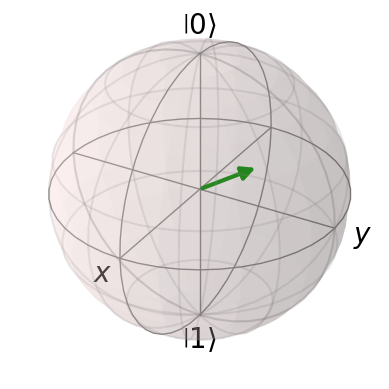

In [5]:
import qutip 

def plotKetBloch(ket):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection="3d")
    sphere=qutip.Bloch(axes=ax)
    sphere.add_states(ket)
    sphere.show()

##Write amplitudes like x+yj :
amplitudeState0=0.7+0.j
amplitudeState1=0.2+0.3j

##Traitement et affichage :
StateTotal=np.array([[amplitudeState0],[amplitudeState1]])
StateTotal=StateTotal/np.sqrt(np.real(StateTotal[0]*np.conjugate(StateTotal[0])+StateTotal[1]*np.conjugate(StateTotal[1])))
plotKetBloch(qutip.Qobj(StateTotal))

A qubit can be manipulated individually by the mean of rotations on the Bloch sphere. Any single qubit evolution might be seen as a rotation matrix, that might be decomposed on Pauli's matrix and identity. In the context of quantum computation, these unitary operators, acting on a single qubit, are called **one-qubit gates**: $\hat{X}$, $\hat{Y}$, $\hat{Z}$, etc... 
* $\hat{X}$ : $\hat{X} |0 \rangle = |1 \rangle $, $\hat{X} |1 \rangle = |0 \rangle $
* $\hat{Y}$ : $\hat{Y} |0 \rangle = i|1 \rangle $, $\hat{Y} |1 \rangle = -i|0 \rangle $
* $\hat{Z}$: $\hat{Z} |0 \rangle = |0 \rangle $, $\hat{Z} |1 \rangle = -|1 \rangle $.
Any unitary transformation $\hat{U}$ can be decomposed as the linear superposition of the gates $\hat{X}$, $\hat{Y}$, $\hat{Z}$ and the identity.

Any operator might be view as $2 \times 2$ matrix in the basis $\lbrace |0\rangle , |1\rangle \rbrace$. For
\begin{equation*}
  |0\rangle = \begin{pmatrix}
             1 \\
             0 \\
          \end{pmatrix}, \text{ and } |1\rangle = \begin{pmatrix}
             0 \\
             1 \\
          \end{pmatrix}.
\end{equation*}
$\hat{X}$, $\hat{Y}$ and $\hat{Z}$ have then the following matrix representation
\begin{equation*}
  \hat{X}=\begin{pmatrix}
            0 & 1 \\
            1 & 0 \\
          \end{pmatrix}, \ \ \hat{Y}=\begin{pmatrix}
            0 & -i \\
            i & 0 \\
          \end{pmatrix}, \ \ \hat{Z}=\begin{pmatrix}
            1 & 0 \\
            0 & -1 \\
          \end{pmatrix}.
\end{equation*}
So $\hat{X}$ exchanges $|0\rangle$ and $|1\rangle$ when $\hat{Z}$ changes $|1\rangle$ in $|-1\rangle$, leaving $|0\rangle$ unchanged.  
In order to perform quantum calculations, we also need gates involving two qubits. The most common are conditional gates, $C-\hat{U}$. This type of gate operates on two qubits $A$ and $B$, where one qubit is called the _control qubit_ (e.g. $A$), and the other is called the _target qubit_ (e.g. $B$). In this type of gate, the state of the control qubit conditions the application (or not) of a gate on the target qubit. If the control qubit is in the state $| 0 \rangle$, the target qubit is not modified. If the control qubit is in the $| 1 \rangle$ state, the one-qubit quantum gate corresponding to the $\hat{U}$ unitary operation is applied to the target qubit. If the state of the control qubit is a superposition of states, the responses on the target qubit are superpositions of the two results. For example, if the control qubit is in the $\alpha | 0 \rangle + \beta |1\rangle$ state and the target qubit in the $| \psi \rangle$ state, the application of a two-qubit gate $C-\hat{U}$ gives the following result
$$ (\alpha | 0 \rangle + \beta |1\rangle) \otimes | \psi \rangle  \stackrel{C-\hat{U}}{\longrightarrow} \alpha | 0 \rangle \otimes | \psi \rangle + \beta | 1 \rangle \otimes  \hat{U}| \psi \rangle. $$

### Hadamard gate: generation of a superposition of states

A Hadamard gate, denoted $\hat{H}$, is a one-qubit gate that can generate superpositions of states, in particular from a qubit initialised in a pure state ($| 0 \rangle $ or $| 1 \rangle $ ). It transforms the state $| 0 \rangle $ into $\hat{H} | 0 \rangle =\displaystyle \frac{| 0 \rangle+| 1 \rangle}{\sqrt{2}}$ and the state $| 1 \rangle$ into $\hat{H} | 1 \rangle = \displaystyle \frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$. The Hadamard gate is a unitary operator such that $\hat{H}^2=\mathbb{I}$, where $\mathbb{I}$ is the identity operator. The matrix representation of an Hadamard gate is then
\begin{equation*}
  \hat{H}=\frac{1}{\sqrt{2}}\begin{pmatrix}
            1 & 1 \\
            1 & -1 \\
          \end{pmatrix}.
\end{equation*}

### $C-NOT$ gate: generation of entanglement

The one-qubit gate $\hat{X}$ transforms $| 0 \rangle $ into $| 1 \rangle $ and vice versa ($| 1 \rangle $ into $| 0 \rangle $). By analogy with classical logic gates, it is also called a NOT gate, because it performs the corresponding logic operation on pure states. It is also sometimes referred to as a **bit-flip** gate. The $C-NOT$ gate is therefore a $C-\hat{X}$ gate. It generates entanglement and Bell's states. Thus, if one denotes $A$ the control qubit and $B$ the target qubit, one has 
$$ C-\hat{X}  \frac{| 0 \rangle_A + |1\rangle_A}{\sqrt{2}} \otimes | 0 \rangle_B = \frac{1}{\sqrt{2}} (|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)=|\Phi^+\rangle.$$
The C-NOT gate generated the Bell state $|\Phi^+\rangle$.

## Quantum teleportation

Quantum teleportation is a technique for transmitting information (encoded in the state of a qubit register) based on the transfer of a quantum state from one system to another, without physical transfer of the initial system. Quantum teleportation is based on the concept of quantum entanglement. The first quantum teleportation protocol was proposed by C. H. Bennett, G. Brassard, C. Crépeau, R. Jozsa, A. Peres and W. K. Wooters in 1993 (C. H. Bennett et al. Teleporting an unknown quantum state via dual classical and EPR channels. Phys. Rev. Lett. 70, 1895-1899, 1993). The first experimental demonstration of quantum teleportation was carried out in 2009, with ytterbium atoms over a distance of 1 meter (S. Olmschenk et al. Science, 323, 486, 2009). In 2017, the QUESS (Quantum Experiments at Space Scale) project experimentally realized quantum teleportation with entangled photons over a distance of around 1,200 km, via transmission via the Mozi satellite, and demonstrating quantum teleportation between ground and space for the first time.

### 1 qubit transfer protocol

Let's consider two people, Alice and Bob, who wish to exchange a quantum state with a qubit by quantum teleportation. Alice has any qubit $| \psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle $ that she wishes to transmit to Bob. Alice and Bob have a classical channel for exchanging classical information (radio, phone, etc.). They also have a quantum channel consisting of a pair of entangled qubits. Alice has qubit A and Bob has qubit B. These two qubits are initially entangled in a Bell state $|\Phi^+\rangle$, before being split between Alice and Bob. 

The system therefore consists of three qubits. Alice has a qubit $A$, and a qubit $C$ in any state $| \psi \rangle$ which she wishes to transmit to Bob. Bob has a qubit $B$ and wishes to obtain the state of qubit $C$. The qubits $A$ and $B$ are initially entangled in the Bell state $|\Phi^+\rangle$ with
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}} \left( | 0 \rangle_A \otimes | 0 \rangle_B + | 1 \rangle_A\otimes | 1 \rangle_B \right). $$

The system of three qubits is then in the state $| \Psi_0 \rangle = |\psi \rangle \otimes|\Phi^+\rangle $.

Alice performs the following protocol
1. Application of a $C-NOT$ gate controlled by the qubit $|\psi \rangle = \alpha | 0 \rangle + \beta | 1 \rangle $ state that she wishes to transfer, qubit $A$ being the target one. The state obtained is thus $$ | \Psi_1 \rangle = \frac{\alpha}{\sqrt{2}} | 0 \rangle \otimes \left( | 0 \rangle_A \otimes| 0 \rangle_B + | 1 \rangle_A \otimes| 1 \rangle_B \right) + \frac{\beta}{\sqrt{2}} | 1 \rangle \otimes \left( | 1 \rangle_A \otimes | 0 \rangle_B + | 0 \rangle_A \otimes| 1 \rangle_B \right). $$
2. Application of a Hadamard gate $\hat{H}$ to qubit $A$. The state obtained is then $$ | \Psi_2 \rangle = \frac{1}{2} | 0 \rangle \otimes | 0 \rangle_A \otimes \left( \alpha | 0 \rangle_B + \beta | 1 \rangle_B \right) + \frac{1}{2} | 0 \rangle \otimes | 1 \rangle_A \otimes \left( \beta | 0 \rangle_B + \alpha | 1 \rangle_B \right) +\frac{1}{2} | 1 \rangle \otimes | 0 \rangle_A \otimes \left( \alpha | 0 \rangle_B - \beta | 1 \rangle_B \right) - \frac{1}{2} | 1 \rangle \otimes | 1 \rangle_A \otimes \left( \beta | 0 \rangle_B - \alpha | 1 \rangle_B \right). $$
3. Alice measures her two qubits

Depending on the values obtained, Alice knows in which state the qubit $B$ is in, and can therefore transmit to Bob via the classical channel the operations to be applied in order to reconstruct the state $ |\psi \rangle $ in qubit $B$. 
* If Alice measures $|0 \rangle_A \otimes|0\rangle_B$ state, noted $00$, then Bob has nothing to do, qubit $B$ is in the state $| \psi \rangle$.
* If Alice obtains $01$, then Bob can reconstruct the state $| \psi \rangle$ by applying the $\hat{X}$ gate to qubit $B$.
* If Alice gets $10$, then Bob will be able to reconstruct the state $| \psi \rangle$ by applying the $\hat{Z}$ gate to qubit $B$.
* If Alice measures $11$, then Bob will be able to reconstruct the state $| \psi \rangle$ by successively applying the $\hat{X}$ and $\hat{Z}$ gates to qubit $B$.

This operation will be carried out with the help of conventional control gates, _i.e._ the action of a gate on a target qubit will be activated according to the result of the measurement of a control qubit. 

# Creation of quantum circuit with myQLM

## Quantum Hello World - generation of a Bell state

### Creation of a quantum circuit

To create a quantum circuit, one need first :
-- to create a quantum program with the library `qat.lang` and its method `Program`. 

-- Once a quantum program is created, a quantum register has to been created with the method `qalloc(Nqbits)` where `Nqubits` is the number of qubits in the quantum register. This methods returns an object iterable containing each qubits of the quantum register. 

-- The quantum circuit is constructed by applying gate from `qat.lang` on qubits. 
    
* For example, applying an Hadamard on the qubit #1 is performed from the following instruction `H(qbits[1])`, with `H` a function from `qat.lang`. 
* For a $C-\hat{U}$ gate, the first argument of the function is the control qubit, and the second argument is the target qubit. Applying a $C-NOT$ gate with qubit #1 as a control qubit, and qubit #0 as a target qubit, is performed from the following instruction `CNOT(qbits[1], qbits[0])`. 
    
-- Once the program is built, a circuit is generated with the method `.to_circ()`.

#### Exercice 1
Create a quantum circuit with a two-qubit register, where a Hadamard is applied to qubit #1, then a $C-NOT$ with qubit #1 as the control qubit and qubit #0 as the target qubit.

In [5]:
from qat.lang import Program, H, CNOT

# creation of a program 'qprog'

# Number of qubits
nbqbits = 2
# Creation of a quantum register


# Adding quantum gates
    # Hadamard on qubit #1
    
    # C-not with qubit #1 as control qubit and qubit #0 as target qubit

# Generation of a quantum circuit


#### Solution exercice 1

In [6]:
from qat.lang import Program, H, CNOT

# creation of a program
qprog = Program()
# Number of qubits
nbqbits = 2
# Creation of a quantum register
qbits = qprog.qalloc(nbqbits)

# Adding quantum gates
H(qbits[1]) # Hadamard on qubit #1
CNOT(qbits[1], qbits[0]) # C-not with qubit #1 as control qubit and qubit #0 as target qubit

# Generation of a quantum circuit
circuit = qprog.to_circ()

In [7]:
print(type(qbits))

<class 'qat.lang.AQASM.bits.QRegister'>


### Graphical visualisation of the quantum circuit

In [8]:
# Graphical visualisation of the quantum circuit - 'display' method
circuit.display()

In [9]:
# Graphical visualisation of the quantum circuit - magic function %qatdisplay
%qatdisplay circuit --svg

In [10]:
# Decomposition of the circuit into elementary gates
for op in circuit.iterate_simple():
    print(op)

('H', [], [1])
('CNOT', [], [1, 0])


### Simulation of the quantum circuit

In order to simulate a quantum circuit, one needs to import a quantum processor unit (QPU). Those GPU might be created with the library `qat.qpus` as methods. For example, one might import `get_default_qpu` or `PyLinalg`.  Once the object QPU has been created, one has to create a job with the method `to_job()` applied to the quantum circuit created previously (`circuit.to_job()`). With no arguments, such method will consist in a single request to the QPU. A request is performed with the method `submit` of the QPU instance, with the `job` object as argument (`qpu.submit(job)`). The result is iterable and contains list of the states and the corresponding complex amplitude with methods `state` and `amplitude`.

#### Exercice 2
Simulate the quantum circuit once, and give the amplitude of each states

In [11]:
# QPU importation (Quantum Processor Unit) - default QPU
from qat.qpus import get_default_qpu
from qat.qpus import PyLinalg

# QPU object creation

# Job creation

# Job submission


# Decomposition of the final state (result) on basis vectors
i=0
amplitudeState=[0+0.j,0.+0.j]
for sample in result:
    print("State %s amplitude %s" % (sample.state, sample.amplitude))
    amplitudeState[i]=sample.amplitude
    i=i+1

NameError: name 'result' is not defined

#### Solution exercice 2

In [12]:
# QPU importation (Quantum Processor Unit) - default QPU
# from qat.qpus import get_default_qpu
from qat.qpus import PyLinalg

# QPU object creation
# qpu = get_default_qpu()
qpu = PyLinalg()

# Job creation
job = circuit.to_job()

# Job submission
result = qpu.submit(job)
# Decomposition of the final state (result) on basis vectors
i=0
amplitudeState=[0+0.j,0.+0.j]
for sample in result:
    print("State %s amplitude %s" % (sample.state, sample.amplitude))
    amplitudeState[i]=sample.amplitude
    i=i+1


State |00> amplitude (0.7071067811865475+0j)
State |11> amplitude (0.7071067811865475+0j)


## Measurements and classical bits

### Classical register
A classical register containing classical bits might be created with the method `calloc(nbcbits)` to a quantum program, with the number of classical bits `nbcbits` as argument. Such classical register is used to store the results of measurements on the quantum register. A qubit is measured with the method `measure(qbits,cbits)` to the quantum program, where `qbits` is the list of the measured qubits and `cbits`the list of the classical bits that will store the result each measurement. `cbits`is the output of the method `calloc(nbcbits)` applied to the quantum program.



#### Exercice 3
In the previous quantym program, add a classical register with 2 classical bits. Add measurements of both qubits at the end of the quantum circuit and store the results in the classical bits. 

In [13]:
# Creation of a classical register
nbcbits = 2


# Creation of the corresponding quantum circuit

# Graphical visualisation of the quantum circuit - 'display' method
circuit.display()

#### Solution exercice 3

In [14]:
# Creation of a classical register
nbcbits = 2
cbits = qprog.calloc(nbcbits)

# qubits measurements
qprog.measure(qbits, cbits)

# Creation of the corresponding quantum circuit
circuit = qprog.to_circ()

# Graphical visualisation of the quantum circuit - 'display' method
circuit.display()

# Decomposition of the circuit into elementary gates
for op in circuit.iterate_simple():
    print(op)

('H', [], [1])
('CNOT', [], [1, 0])
('MEASURE', [0, 1], [0, 1])


## Classical measurement and statistics


### Result of a single request

In [15]:
# Job creation
job = circuit.to_job(nbshots=1, aggregate_data=False) # nbshots = number of realisation for statistics

In [16]:
# single request
res = qpu.submit(job) # request
# displaying results
for meas_res in res.raw_data[0].intermediate_measurements:
    print("---- final state of the quantum and classical register ------")
    print("Quantum register = %s (bit order q0 q1)"% res.raw_data[0].state)
    print("Measurement = %s (gate position = %s)"%(meas_res.cbits, meas_res.gate_pos))

---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1, 1] (gate position = 2)


### Results of several requests

In [17]:
nb_req=10
for _ in range(nb_req):
    res = qpu.submit(job) # request
    # display results
    for meas_res in res.raw_data[0].intermediate_measurements:
        print("\nQuery #%s"% (_+1))
        print("---- final state of the quantum and classical register ------")
        print("Quantum register = %s (bit order q0 q1)"% res.raw_data[0].state)
        print("Measurement = %s (gate position = %s)"%(meas_res.cbits, meas_res.gate_pos))


Query #1
---- final state of the quantum and classical register ------
Quantum register = |00> (bit order q0 q1)
Measurement = [0, 0] (gate position = 2)

Query #2
---- final state of the quantum and classical register ------
Quantum register = |00> (bit order q0 q1)
Measurement = [0, 0] (gate position = 2)

Query #3
---- final state of the quantum and classical register ------
Quantum register = |00> (bit order q0 q1)
Measurement = [0, 0] (gate position = 2)

Query #4
---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1, 1] (gate position = 2)

Query #5
---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1, 1] (gate position = 2)

Query #6
---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1, 1] (gate position = 2)

Query #7
---- final state of the quantum and classical register -----

## Classical control gate

In the quantum teleportation algorithm, one need also to perform operations on qubits depending on classical results from measurements. It is performed with classical control gate. The method used on the quantum program is `cc_apply(cbits[i], U, qbits[j])` where `cbits[i]` is the classical control bit, `U`the gate applied and `cbits[j]` the target qubit. It requires to perform measurement priori to the classical control gate. 

#### Exercice 4
1) Create a quantum program with a quantum register made of 2 qubits, and a classical register with 1 classical bit. 
2) Add Hadamard gate on qubit #1.
3) Add a measurement of qubit #1 in the classical register, followed by a classical control gate with the result as a classical control to an Hadamard on the target qubit #0 of the quantum register.
4) Create and display the corresponding circuit
5) Submit a job to QPU for 10 realisations of the circuit, and display the results of each realisation

In [18]:
# Creation of a program
qprog = Program()
# Number of qbits
nbqbits = 2
# Creation of a quantum register

# Number of classical bits
nbcbits = 1
# Creation of a classical register

# Hadamard on qubit #1

# Apply Hadamard only if cbits[0] is set


# Creation of the corresponding quantum circuit


# Graphical visualisation of the quantum circuit - 'display' method

# results


#### Solution exercice 4

In [19]:
# Creation of a program
qprog = Program()
# Number of qbits
nbqbits = 2
# Creation of a quantum register
qbits = qprog.qalloc(nbqbits)
# Number of classical bits
nbcbits = 1
# Creation of a classical register
cbits = qprog.calloc(nbcbits)

# Hadamard on qubit #1
H(qbits[1])

# Apply Hadamard only if cbits[0] is set
qprog.measure(qbits[1], cbits[0])
qprog.cc_apply(cbits[0], H, qbits[0])

# Creation of the corresponding quantum circuit
circuit = qprog.to_circ()

# Graphical visualisation of the quantum circuit - 'display' method
circuit.display()

# results
job = circuit.to_job(nbshots=1, aggregate_data=False)
result = qpu.submit(job)
nb_req=20
for _ in range(nb_req):
    res = qpu.submit(job) # requête
    # results display
    for meas_res in res.raw_data[0].intermediate_measurements:
        print("\nQuery #%s"% (_+1))
        print("---- final state of the quantum and classical register ------")
        print("Quantum register = %s (bit order q0 q1)"% res.raw_data[0].state)
        print("Measurement = %s (gate position = %s)"%(meas_res.cbits, meas_res.gate_pos))


Query #1
---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1] (gate position = 1)

Query #2
---- final state of the quantum and classical register ------
Quantum register = |00> (bit order q0 q1)
Measurement = [0] (gate position = 1)

Query #3
---- final state of the quantum and classical register ------
Quantum register = |01> (bit order q0 q1)
Measurement = [1] (gate position = 1)

Query #4
---- final state of the quantum and classical register ------
Quantum register = |00> (bit order q0 q1)
Measurement = [0] (gate position = 1)

Query #5
---- final state of the quantum and classical register ------
Quantum register = |01> (bit order q0 q1)
Measurement = [1] (gate position = 1)

Query #6
---- final state of the quantum and classical register ------
Quantum register = |11> (bit order q0 q1)
Measurement = [1] (gate position = 1)

Query #7
---- final state of the quantum and classical register ------
Quantum register

It is also possible to reset a classical register with the method `reset`.

In [20]:
# Classical register initialization
# reset classical bit #0
qprog.reset([],cbits[0])
# Graphical visualisation of the quantum circuit - 'display' method
circuit = qprog.to_circ()
circuit.display()

# Quantum teleportation with MyQLM

Source: https://myqlm.github.io/index.html

https://notebooks.gesis.org/binder/jupyter/user/myqlm-myqlm-notebooks-5jmqc7mg/notebooks/tutorials/lang/measurements_and_classic_operations.ipynb

In [21]:
from qat.lang.AQASM import Program, H, CNOT, Z, X, RZ, RX
tp_prog = Program()
# We need 3 qbits this time
qbits = tp_prog.qalloc(3)
# We will teleport the state of the first qbit
source = qbits[0] 
# into the last qbit
target = qbits[2]
# Qbit 1 will be used to create an EPR pair with the target qbit
tp_prog.apply(H, qbits[1])
tp_prog.apply(CNOT,qbits[1],target)

In [22]:
tp_prog.apply(CNOT,source,qbits[1])
tp_prog.apply(H,source)

In [23]:
results = tp_prog.calloc(2)

In [24]:
#tp_prog.measure([source,qbits[1]],results)
# equivalent to:
tp_prog.measure(source, results[0])
tp_prog.measure(qbits[1], results[1])

In [25]:
tp_prog.cc_apply(results[0], Z, target)
tp_prog.cc_apply(results[1], X, target)

In [26]:
circ = tp_prog.to_circ()
circ.display()

### Case of a random state

In [27]:
# We will generate a random state over the first qubit by applying three random rotations
import random, numpy

tp_prog = Program()
qbits = tp_prog.qalloc(3)
source = qbits[0] 
target = qbits[2]

# Lets prepare a random state
angles = [random.random() * 2. * numpy.pi for _ in range(3)]

tp_prog.apply(RZ(angles[0]), source)
tp_prog.apply(RX(angles[1]), source)
tp_prog.apply(RZ(angles[2]), source)

# Lets fetch the circuit at this stage, in order to compare with the end result
c_init = tp_prog.to_circ()

# And apply the teleportation circuit
tp_prog.apply(H, qbits[1])
tp_prog.apply(CNOT,qbits[1],target)
tp_prog.apply(CNOT,source,qbits[1])
tp_prog.apply(H,source)
results = tp_prog.calloc(2)
#tp_prog.measure([source,qbits[1]],results)
# equivalent to:
tp_prog.measure(source, results[0])
tp_prog.measure(qbits[1], results[1])
tp_prog.cc_apply(results[0], Z, target)
tp_prog.cc_apply(results[1], X, target)

circuit = tp_prog.to_circ()

In [28]:
circuit.display()

In [29]:
from qat.qpus import PyLinalg
qpu = PyLinalg()

job_full = circuit.to_job(nbshots=1000)
result_full = qpu.submit(job_full)
job_init = c_init.to_job(nbshots=1000)
result_init = qpu.submit(job_init)

print("Initial state of the system")
for s in result_init:
    print(s.state, s.probability)
    
print("\nAnd after teleportation")
for s in result_full:
    print(s.state, s.probability)

Initial state of the system
|000> 0.778
|100> 0.222

And after teleportation
|010> 0.197
|100> 0.213
|000> 0.192
|110> 0.185
|011> 0.05
|101> 0.056
|001> 0.054
|111> 0.053


/home/bsenjean/python3.10/lib/python3.10/site-packages/qat/pylinalg/service.py:172: FutureWarning: Option aggregate_data of your job is True, discarding intermediate measures
  result = aggregate_data(result)
